# Задачи
Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.
Какой клиент совершил больше всего успешных операций? (success == True)
С какой платформы осуществляется наибольшее количество успешных операций?
Какую платформу предпочитают премиумные клиенты?
Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет
Постройте график распределения числа успешных операций
Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?
      
# Описание данных
* user_data:

client – идентификатор пользователя\
premium – является ли клиент премиум\
age – возраст\

logs:

client – идентификатор пользователя\
success – результат (успех - 1, нет - 0)\
platform – платформа\
time – время в формате Unix

In [1]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df1 = pd.read_csv('3_user_data.csv') 

In [3]:
df2 = pd.read_csv('3_logs.csv') 

In [113]:
success_number = df2.query('success == True') \
   .groupby('client', as_index = False) \
   .agg({'platform':'count'}) \
   .sort_values('platform' , ascending = False) \
   .head(10)

In [115]:
success_number

,client,platform
332,12179,41
1758,61468,41
1487,52870,41
1759,61473,41
2626,92584,41
2345,82563,41
2231,78349,41
1020,36165,41
810,28719,41
1826,64064,40


In [114]:
max = success_number.platform.max()

In [126]:
success_client = success_number.query('platform == @max') \
              .sort_values('client') \
              .client \
              .tolist()
              

In [127]:
success_client

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

In [131]:
' ,'.join([str(client) for client in success_client])

'12179 ,28719 ,36165 ,52870 ,61468 ,61473 ,78349 ,82563 ,92584'

In [149]:
df2.query('success == True') \
   .groupby('platform', as_index = False) \
   .agg({'client':'count'}) \

  

,platform,client
0,computer,1090
1,phone,2019
2,tablet,180


In [208]:
df3 = df1.merge(df2) 
            

In [158]:
df3

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


In [177]:
df3.query('premium == True') \
   .groupby('platform' , as_index = False) \
   .agg({'age':'count'})
  


,platform,age
0,computer,150
1,phone,246
2,tablet,24


In [164]:
df3.query('premium == True').platform.value_counts()

phone       246
computer    150
tablet       24
Name: platform, dtype: int64

In [180]:
prem = df3.groupby(['premium','age'], as_index=False) \
   .agg({'platform':'count'}) \
   .rename(columns = {'platform' : 'count'})

In [181]:
prem

,premium,age,count
0,False,20,46
1,False,21,50
2,False,22,51
3,False,23,43
4,False,24,86
...,...,...,...
95,True,65,10
96,True,66,7
97,True,67,11
98,True,68,9


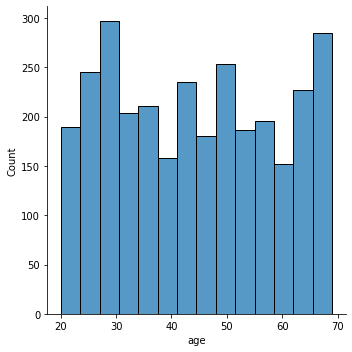

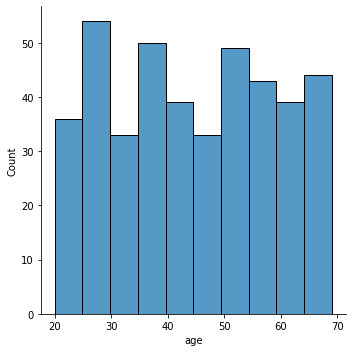

In [190]:
sns.displot(df3.query('premium == False').age) 
sns.displot(df3.query('premium == True').age)


In [198]:
client_sus = df3.groupby('client') \
   .agg({'success':'sum'}) \
   .sort_values('success', ) 

In [201]:
client_sus

,success
client,
78883,0
33906,0
33831,0
33805,0
76862,0
...,...
12179,41
36165,41
61473,41


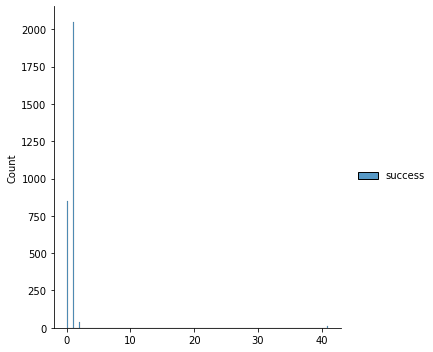

In [199]:
sns.displot(client_sus, kde = False)

In [200]:
client_sus.success.value_counts()

1     2051
0      850
2       42
41       9
3        1
40       1
Name: success, dtype: int64

In [217]:
bb = df3.query("platform == 'computer'") \
   .groupby('age', as_index = False) \
   .agg({'success':'count'}) \
   .sort_values('success', ) 

In [218]:
bb

,age,success
36,56,8
33,53,11
2,22,12
10,30,15
14,34,16
35,55,16
21,41,16
19,39,16
3,23,17
31,51,17


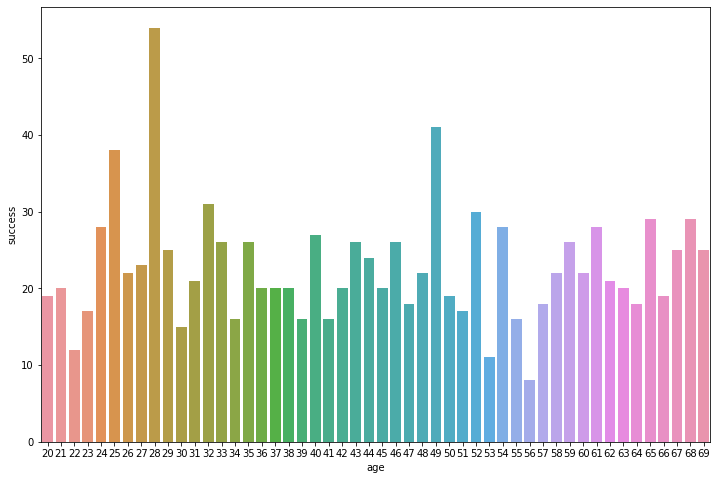

In [221]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x = bb.age , y = bb.success , data = bb)